# Analysis - Computational Model of $\textit{Major Depressive Disorder (MDD)}$
##### Kevin Kistermann - Master Thesis [Universität Tübingen, Quantitative Data Science Methods (M.Sc.)]  

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#### 1. Data: 100 Individual over 1 Year

In [2]:
import pickle

# Load Data with no Treatment
with open("paramters_dict.pkl", 'rb') as file:
    paramters_dict = pickle.load(file)
with open("data_dict.pkl", 'rb') as file:
    data_dict = pickle.load(file)

# Load Data with NCS changes
with open("paramters_dict_NCS.pkl", 'rb') as file:
    paramters_dict_NCS = pickle.load(file)
with open("data_dict_NCS.pkl", 'rb') as file:
    data_dict_NCS = pickle.load(file)

# Load Data with SSRI Treatment
with open("paramters_dict_SSRIs.pkl", 'rb') as file:
    paramters_dict_SSRI = pickle.load(file)
with open("data_dict_SSRIs.pkl", 'rb') as file:
    data_dict_SSRI = pickle.load(file)

In [38]:
data = data_dict["person_0"]
data_SSRI = data_dict_SSRI["person_0"]
data_NCS = data_dict_NCS["person_0"]
# data[0] --> [stress stimuli]
# data[2] --> [perceived stress]
# data[3] --> [cognitive performance]
# data[4] --> [learning, reward processing and memory]
# data[5] --> [negative cognitive schema]
# data[6] --> [cytokine]
# data[7] --> [effective GR]
# data[8] --> [cortisol]
# data[9] --> [monomines]
# data[10] --> [neurodegeneration]
# data[11] --> "symptom-counter" for MDD diagnosis

parameters = paramters_dict["person_0"]
# paramters[0] = EAE
# paramters[1] = NCS
# paramters[2] = S
# paramters[3] = Re
# paramters[4] = E
# paramters[5] = H
# paramters[6] = sigma

Create a function that calculates the numer of MDD periods and their average lenght for each individual

In [3]:
def MDD_period_count_and_average_length(arr, threshold=3):
    # Create a boolean array where True indicates values greater than the threshold
    greater_than_threshold = arr >= threshold
    
    # Find the difference between consecutive elements in the boolean array
    diff = np.diff(greater_than_threshold.astype(int))
    
    # Find the start of each period (where diff == 1) and end of each period (where diff == -1)
    starts = np.where(diff == 1)[0] + 1
    ends = np.where(diff == -1)[0] + 1
    
    # If the array starts with a period, prepend a start at index 0
    if greater_than_threshold[0]:
        starts = np.insert(starts, 0, 0)
    
    # If the array ends with a period, append an end at the last index
    if greater_than_threshold[-1]:
        ends = np.append(ends, len(arr))
    
    # Calculate the lengths of each period
    lengths = ends - starts
    
    # Calculate the number of periods
    num_periods = len(lengths)
    
    # Calculate the average length of the periods, handling the case where num_periods is 0
    average_length = np.mean(lengths) if num_periods > 0 else 0
    
    return num_periods, average_length

#### 2. Create an pd.dataframe with the relevant data for the analysis

In [4]:
analysis_data = np.zeros([23, 100])
# analysis_data[0] = EAE
# analysis_data[1] = S
# analysis_data[2] = Re
# analysis_data[3] = E
# analysis_data[4] = H

# analysis_data[5] = count of MDD episodes (no Treatment)
# analysis_data[6] = avg length of MDD episodes (no Treatment)
# analysis_data[7] = avg [C]
# analysis_data[8] = avg [L]
# analysis_data[9] = avg [NCS]
# analysis_data[10] = avg [PS]
# analysis_data[11] = avg [c]
# analysis_data[12] = avg [m]

# analysis_data[13] = count of MDD episodes (SSRIs)
# analysis_data[14] = avg length of MDD episodes (SSRIs)
# analysis_data[15] = avg [C]
# analysis_data[16] = avg [L]
# analysis_data[17] = avg [NCS]
# analysis_data[18] = avg [PS]
# analysis_data[19] = avg [c]
# analysis_data[20] = avg [m]

# analysis_data[21] = count of MDD episodes (NCS)
# analysis_data[22] = avg length of MDD episodes (NCS)

# get the fixed paramters for each individual in the analysis_data array
for idx, (key, data) in enumerate(paramters_dict.items()):
    analysis_data[0, idx] = data[0] # EAE
    analysis_data[1, idx] = data[2] # S
    analysis_data[2, idx] = data[3] # Re
    analysis_data[3, idx] = data[4] # E
    analysis_data[4, idx] = data[5] # H

# get the number of MDD periods and their average length from the 'no treatment' data 
for idx, (key, data) in enumerate(data_dict.items()):
    count_column = data[11]
    # Extract values for each day
    day_values = count_column[::1440]
    # Analyze the day_values for MDD periods
    num_periods, avg_length = MDD_period_count_and_average_length(day_values)
    
    # Store results in analysis_data
    analysis_data[5, idx] = num_periods # count of MDD episodes (no Treatment)
    analysis_data[6, idx] = avg_length # avg length of MDD episodes (no Treatment)
    analysis_data[7, idx] = np.mean(data[3]) # avg [C]
    analysis_data[8, idx] = np.mean(data[4]) # avg [L]
    analysis_data[9, idx] = np.mean(data[5]) # avg [NCS]
    analysis_data[10, idx] = np.mean(data[2]) # avg [PS]
    analysis_data[11, idx] = np.mean(data[8]) # avg [c]
    analysis_data[12, idx] = np.mean(data[9]) # avg [m]

# get the number of MDD periods and their average length from the 'SSRI treatment' data 
for idx, (key, data) in enumerate(data_dict_SSRI.items()):
    count_column = data[11]
    
    # Extract values for each day
    day_values = count_column[::1440]
    
    # Analyze the day_values for MDD periods
    num_periods, avg_length = MDD_period_count_and_average_length(day_values)
    
    # Store results in analysis_data
    analysis_data[13, idx] = num_periods # count of MDD episodes (SSRIs)
    analysis_data[14, idx] = avg_length # avg length of MDD episodes (SSRIs)
    analysis_data[15, idx] = np.mean(data[3]) # avg [C]
    analysis_data[16, idx] = np.mean(data[4]) # avg [L]
    analysis_data[17, idx] = np.mean(data[5]) # avg [NCS]
    analysis_data[18, idx] = np.mean(data[2]) # avg [PS]
    analysis_data[19, idx] = np.mean(data[8]) # avg [c]
    analysis_data[20, idx] = np.mean(data[9]) # avg [m]

# get the number of MDD periods and their average length from the 'NCS treatment' data 
for idx, (key, data) in enumerate(data_dict_NCS.items()):
    count_column = data[11]
    
    # Extract values for each day
    day_values = count_column[::1440]
    
    # Analyze the day_values for MDD periods
    num_periods, avg_length = MDD_period_count_and_average_length(day_values)
    
    # Store results in analysis_data
    analysis_data[21, idx] = num_periods # count of MDD episodes (NCS)
    analysis_data[22, idx] = avg_length # avg length of MDD episodes (NCS)

df = pd.DataFrame(analysis_data)
df = df.transpose()

# rename columns
df.columns = ["EAE", "S", "Re", "E", "H", "count_noT", "avgL_noT", "noT_avgC", "noT_avgL", "noT_avgNCS", "noT_avgPS", "noT_avgc", "noT_avgm", "count_SSRI", "avgL_SSRI", "SSRI_avgC", "SSRI_avgL", "SSRI_avgNCS", "SSRI_avgPS", "SSRI_avgc", "SSRI_avgm", "count_NCS", "avgL_NCS"]

df['SS_var'] = df["Re"] + df["E"] + df["H"]

# remove individuals with no MDD diagnosis
df_MDD = df[df.iloc[:, 5] != 0]

# sort by EAE values and variance of [SS]
EAE = df_MDD.sort_values(by=["EAE"])
NCS = df_MDD.sort_values(by=["noT_avgNCS"])

In [6]:
df_MDD


,EAE,S,Re,E,H,count_noT,avgL_noT,noT_avgC,noT_avgL,noT_avgNCS,...,avgL_SSRI,SSRI_avgC,SSRI_avgL,SSRI_avgNCS,SSRI_avgPS,SSRI_avgc,SSRI_avgm,count_NCS,avgL_NCS,SS_var
0,0.449125,0.155995,0.557226,0.029524,0.451337,4.0,26.250000,0.543869,0.397577,0.539817,...,18.600000,0.596462,0.440982,0.526667,0.436103,0.471492,0.397755,1.0,12.0,1.038087
1,0.000378,0.039245,0.427569,0.414747,0.685293,4.0,17.750000,0.617565,0.473895,0.236927,...,17.000000,0.664443,0.516760,0.270078,0.246194,0.307834,0.420323,2.0,7.0,1.527609
3,0.362845,0.061384,0.699787,0.041147,0.384446,2.0,13.500000,0.654273,0.461945,0.474567,...,7.000000,0.687719,0.493038,0.453307,0.094782,0.348384,0.394484,1.0,11.0,1.125379
5,0.612564,0.583171,0.692960,0.528886,0.694391,5.0,14.800000,0.584136,0.331953,0.648008,...,13.200000,0.631025,0.371040,0.625268,0.235055,0.351975,0.409348,1.0,18.0,1.916238
7,0.089122,0.186218,0.039810,0.202822,0.695438,1.0,8.000000,0.649359,0.449146,0.301840,...,0.000000,0.682343,0.481016,0.282607,0.107871,0.275141,0.393098,0.0,0.0,0.938070
10,0.973800,0.206618,0.656867,0.007650,0.792366,1.0,29.000000,0.650835,0.441021,0.742783,...,25.000000,0.688336,0.478099,0.742071,0.086785,0.282037,0.403761,1.0,7.0,1.456883
11,0.902499,0.025554,0.870352,0.207026,0.149275,6.0,25.500000,0.495454,0.369019,0.995461,...,16.428571,0.556292,0.412720,0.903023,0.547029,0.679974,0.367404,1.0,14.0,1.226652
12,0.172401,0.964222,0.318940,0.004316,0.826972,1.0,11.000000,0.623100,0.281032,0.706155,...,7.000000,0.657169,0.309266,0.699634,0.061045,0.240182,0.403678,1.0,6.0,1.150228
13,0.105061,0.025596,0.328944,0.011540,0.914786,3.0,14.333333,0.636321,0.492373,0.721113,...,12.000000,0.681707,0.534498,0.754264,0.184476,0.252230,0.419517,1.0,15.0,1.255270
14,0.990840,0.709049,0.989218,0.762195,0.887712,2.0,12.000000,0.630772,0.331178,0.788594,...,12.000000,0.667207,0.364338,0.789032,0.071757,0.256576,0.408262,1.0,14.0,2.639124


In [7]:
# some descpriptive statistics

print(df_MDD.shape)
print(df_MDD['count_noT'].mean())
print(df_MDD['avgL_noT'].mean())

# Treatment: SSRIs
print(df_MDD['count_SSRI'].mean())
print(df_MDD['avgL_SSRI'].mean())

# Treatment: Psychedelics
print(df_MDD['count_NCS'].mean())
print(df_MDD['avgL_NCS'].mean())

(51, 24)
3.4705882352941178
19.630329909741675
4.03921568627451
14.527087291793174
1.2156862745098038
10.176470588235293


(0.0, 14.0)

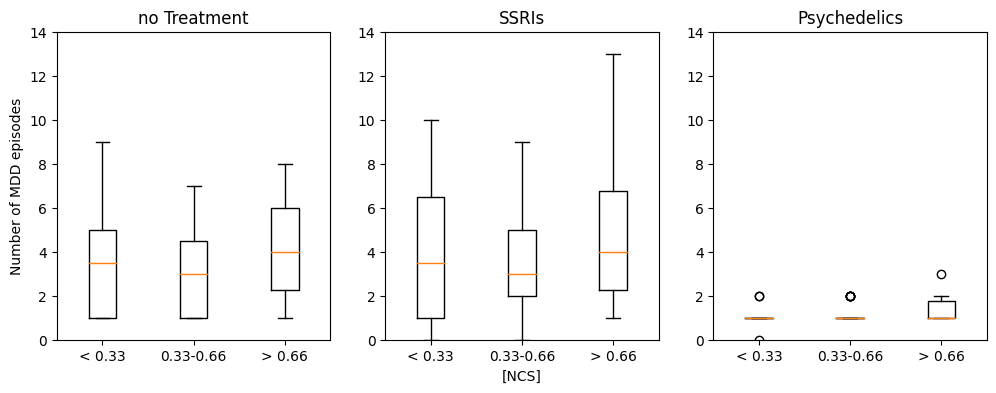

In [8]:
NCS['boxplot'] = pd.cut(NCS['noT_avgNCS'], bins=3, labels=['< 0.33', '0.33-0.66', '> 0.66'])
grouped_data = [NCS[NCS['boxplot'] == group]['count_noT'] for group in NCS['boxplot'].cat.categories]
grouped_data_SSRI = [NCS[NCS['boxplot'] == group]['count_SSRI'] for group in NCS['boxplot'].cat.categories]
grouped_data_NCS = [NCS[NCS['boxplot'] == group]['count_NCS'] for group in NCS['boxplot'].cat.categories]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].boxplot(grouped_data, labels=NCS['boxplot'].cat.categories)
ax[0].set_title('no Treatment')

ax[0].set_ylabel('Number of MDD episodes')
ax[0].set_ylim(0, 14)

# Plot the second boxplot
ax[1].boxplot(grouped_data_SSRI, labels=NCS['boxplot'].cat.categories)
ax[1].set_title('SSRIs')
ax[1].set_xlabel('[NCS]')
ax[1].set_ylim(0, 14)

# Plot the third boxplot
ax[2].boxplot(grouped_data_NCS, labels=NCS['boxplot'].cat.categories)
ax[2].set_title('Psychedelics')

ax[2].set_ylim(0, 14)

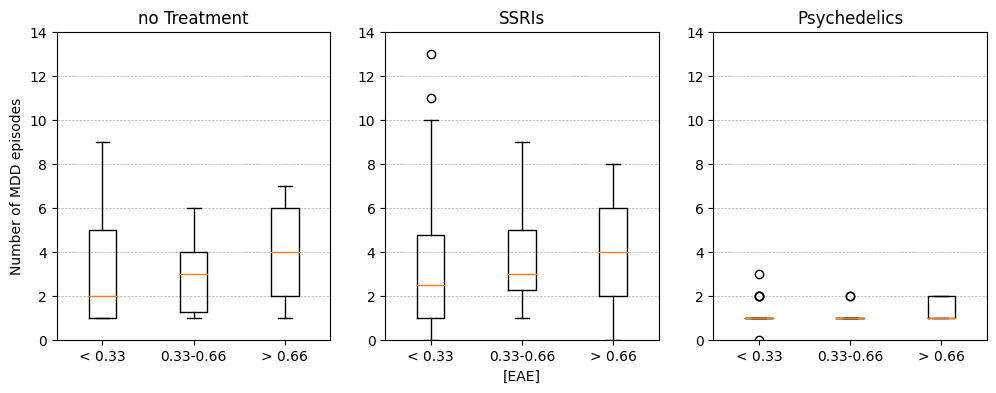

In [11]:
# Group column 'EAE' into 3 bins (low, medium, high)
EAE['boxplot'] = pd.cut(EAE['EAE'], bins=3, labels=['< 0.33', '0.33-0.66', '> 0.66'])
grouped_data = [EAE[EAE['boxplot'] == group]['count_noT'] for group in EAE['boxplot'].cat.categories]
grouped_data_SSRI = [EAE[EAE['boxplot'] == group]['count_SSRI'] for group in EAE['boxplot'].cat.categories]
grouped_data_NCS = [EAE[EAE['boxplot'] == group]['count_NCS'] for group in EAE['boxplot'].cat.categories]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].boxplot(grouped_data, labels=EAE['boxplot'].cat.categories)
ax[0].set_title('no Treatment')
ax[0].set_ylabel('Number of MDD episodes')
ax[0].set_ylim(0, 14)
# Add gridlines for better readability
ax[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Plot the second boxplot
ax[1].boxplot(grouped_data_SSRI, labels=EAE['boxplot'].cat.categories)
ax[1].set_title('SSRIs')
ax[1].set_xlabel('[EAE]')
ax[1].set_ylim(0, 14)
# Add gridlines for better readability
ax[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Plot the third boxplot
ax[2].boxplot(grouped_data_NCS, labels=EAE['boxplot'].cat.categories)
ax[2].set_title('Psychedelics')
ax[2].set_ylim(0, 14)
# Add gridlines for better readability
ax[2].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

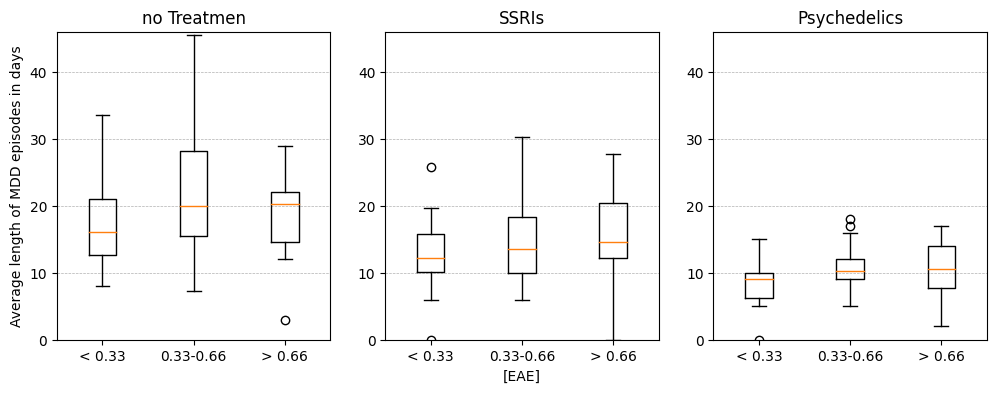

In [12]:
# Group column 'EAE' into 3 bins (low, medium, high)
EAE['boxplot'] = pd.cut(EAE['EAE'], bins=3, labels=['< 0.33', '0.33-0.66', '> 0.66'])
grouped_data = [EAE[EAE['boxplot'] == group]['avgL_noT'] for group in EAE['boxplot'].cat.categories]
grouped_data_SSRI = [EAE[EAE['boxplot'] == group]['avgL_SSRI'] for group in EAE['boxplot'].cat.categories]
grouped_data_NCS = [EAE[EAE['boxplot'] == group]['avgL_NCS'] for group in EAE['boxplot'].cat.categories]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].boxplot(grouped_data, labels=EAE['boxplot'].cat.categories)
ax[0].set_title('no Treatmen')
ax[0].set_ylabel('Average length of MDD episodes in days')
ax[0].set_ylim(0, 46)
# Add gridlines for better readability
ax[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Plot the second boxplot
ax[1].boxplot(grouped_data_SSRI, labels=EAE['boxplot'].cat.categories)
ax[1].set_title('SSRIs')
ax[1].set_xlabel('[EAE]')
ax[1].set_ylim(0, 46)
# Add gridlines for better readability
ax[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Plot the second boxplot
ax[2].boxplot(grouped_data_NCS, labels=EAE['boxplot'].cat.categories)
ax[2].set_title('Psychedelics')
ax[2].set_ylim(0, 46)
# Add gridlines for better readability
ax[2].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

Did treatment with SSRIs  
a) increase [C], [L], [c]  
b) decrease [NCS] and [PS]  



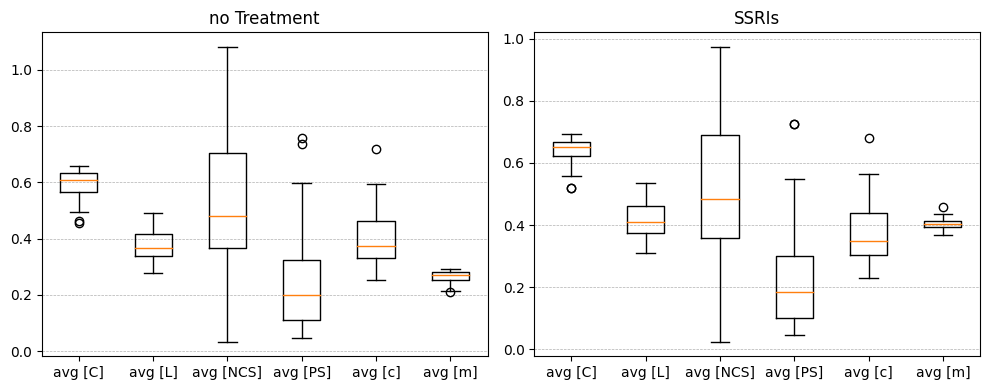

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# First boxplot for no Treatment
ax[0].boxplot([df_MDD[col] for col in ["noT_avgC", "noT_avgL", "noT_avgNCS", "noT_avgPS", "noT_avgc", "noT_avgm"]])
ax[0].set_title('no Treatment')
# Custom labels
ax[0].set_xticklabels(['avg [C]', 'avg [L]', 'avg [NCS]', 'avg [PS]', 'avg [c]', 'avg [m]'])
# Add gridlines for better readability
ax[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Second boxplot for SSRIs
ax[1].boxplot([df_MDD[col] for col in ["SSRI_avgC", "SSRI_avgL", "SSRI_avgNCS", "SSRI_avgPS", "SSRI_avgc", "SSRI_avgm"]])
ax[1].set_title('SSRIs')
# Custom labels
ax[1].set_xticklabels(['avg [C]', 'avg [L]', 'avg [NCS]', 'avg [PS]', 'avg [c]', 'avg [m]'])
# Add gridlines for better readability
ax[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

#### 2. Data: 10 Individual over 10 Years

In [ ]:
import pickle

# Load Data with no Treatment
with open("paramters_dict_long.pkl", 'rb') as file:
    paramters_dict = pickle.load(file)
with open("data_dict_long.pkl", 'rb') as file:
    data_dict = pickle.load(file)

# Load Data with NCS changes
with open("paramters_dict_NCS_long.pkl", 'rb') as file:
    paramters_dict_NCS = pickle.load(file)
with open("data_dict_NCS_long.pkl", 'rb') as file:
    data_dict_NCS = pickle.load(file)

# Load Data with SSRI Treatment
with open("paramters_dict_SSRIs_long.pkl", 'rb') as file:
    paramters_dict_SSRI = pickle.load(file)
with open("data_dict_SSRIs_long.pkl", 'rb') as file:
    data_dict_SSRI = pickle.load(file)